# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

5cbc3f74a930b75e462363287b3e931f


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities[0]

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
CityList = []
Lat = []
Lng = []
Temp = []
Hum = []
Cld = []
WS = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}units={units}&appid={weather_api_key}"

for x in range(len(cities)):
    try:
        print(f"Processing Record {x}, {cities[x]}")
        target_url = (query_url + '&q='+ cities[x])
        response = requests.get(target_url).json()
        CityList.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Temp.append(response['main']['temp_max'])
        Hum.append(response['main']['humidity'])
        Cld.append(response['clouds']['all'])
        WS.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
    except KeyError:
        print("City not found, skipping...")

#response

Processing Record 0, jamestown
Processing Record 1, taolanaro
City not found, skipping...
Processing Record 2, ushuaia
Processing Record 3, kapaa
Processing Record 4, cape town
Processing Record 5, avarua
Processing Record 6, juneau
Processing Record 7, barawe
City not found, skipping...
Processing Record 8, rikitea
Processing Record 9, iqaluit
Processing Record 10, upernavik
Processing Record 11, tsihombe
City not found, skipping...
Processing Record 12, vaini
Processing Record 13, ambilobe
Processing Record 14, puerto ayora
Processing Record 15, butaritari
Processing Record 16, amderma
City not found, skipping...
Processing Record 17, tabas
Processing Record 18, atuona
Processing Record 19, kiunga
Processing Record 20, hobart
Processing Record 21, constantine
Processing Record 22, lagoa
Processing Record 23, hasaki
Processing Record 24, tasiilaq
Processing Record 25, muros
Processing Record 26, jiroft
City not found, skipping...
Processing Record 27, slave lake
Processing Record 28, 

Processing Record 239, kuala terengganu
Processing Record 240, chuka
Processing Record 241, nouadhibou
Processing Record 242, hesperia
Processing Record 243, burica
City not found, skipping...
Processing Record 244, la ronge
Processing Record 245, pindiga
Processing Record 246, longyearbyen
Processing Record 247, jacmel
Processing Record 248, hami
Processing Record 249, palu
Processing Record 250, padang
Processing Record 251, kangaatsiaq
Processing Record 252, srivardhan
Processing Record 253, calama
Processing Record 254, prince rupert
Processing Record 255, champerico
Processing Record 256, breytovo
Processing Record 257, dombarovskiy
Processing Record 258, kundiawa
Processing Record 259, bur gabo
City not found, skipping...
Processing Record 260, ijaki
City not found, skipping...
Processing Record 261, sterling
Processing Record 262, qaanaaq
Processing Record 263, kamen-rybolov
Processing Record 264, kavieng
Processing Record 265, turbat
Processing Record 266, villa maria
Processin

Processing Record 470, kuche
City not found, skipping...
Processing Record 471, harrison
Processing Record 472, huadian
Processing Record 473, westport
Processing Record 474, atar
Processing Record 475, saint-leu
Processing Record 476, malwan
City not found, skipping...
Processing Record 477, ereymentau
Processing Record 478, balkanabat
Processing Record 479, llangefni
Processing Record 480, salalah
Processing Record 481, ust-nera
Processing Record 482, guadalupe victoria
Processing Record 483, gobabis
Processing Record 484, ajdabiya
Processing Record 485, aripuana
Processing Record 486, aranos
Processing Record 487, bahia honda
Processing Record 488, kokoda
Processing Record 489, tarko-sale
Processing Record 490, romodanovo
Processing Record 491, licheng
Processing Record 492, zyryanka
Processing Record 493, havoysund
Processing Record 494, semirom
Processing Record 495, tiznit
Processing Record 496, kununurra
Processing Record 497, nkhotakota
Processing Record 498, vetluga
Processing

In [5]:
print(len(CityList), len(Lat))

551 551


In [6]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.0205, 'lon': -93.218},
 'dt': 1627341613,
 'id': 5044290,
 'main': {'feels_like': 89.73,
          'humidity': 45,
          'pressure': 1013,
          'temp': 88.25,
          'temp_max': 89.74,
          'temp_min': 85.93},
 'name': 'Saint Anthony',
 'sys': {'country': 'US',
         'id': 4900,
         'sunrise': 1627296702,
         'sunset': 1627350409,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'gust': 31.07, 'speed': 10.36}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(data={'City':CityList,'Lat':Lat,'Lng':Lng,'Max Temp (F)':Temp,'Humidity (%)':Hum,'Cloudiness (%)':Cld,'Windspeed (mph)':WS,'Country':Country,'Date':Date})
df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Windspeed (mph),Country,Date
0,Jamestown,42.0970,-79.2353,78.85,47,1,8.05,US,1627341823
1,Ushuaia,-54.8000,-68.3000,35.26,80,75,9.22,AR,1627341822
2,Kapaa,22.0752,-159.3190,84.52,77,75,5.01,US,1627341742
3,Cape Town,-33.9258,18.4232,58.08,60,0,1.01,ZA,1627341739
4,Avarua,-21.2078,-159.7750,78.85,73,40,9.22,CK,1627341491


In [36]:
df.to_csv(r'..\output_data\CityWeatherData.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Windspeed (mph),Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,18.464242,16.046912,68.893702,71.186933,52.058076,7.994646,1.627342e+09
std,33.778753,91.320662,13.905832,20.683491,36.914696,5.694317,1.207641e+02
min,-54.800000,-175.200000,35.260000,6.000000,0.000000,0.000000,1.627341e+09
25%,-11.721100,-64.609800,58.795000,59.000000,16.000000,3.960000,1.627342e+09
50%,22.903600,19.234500,69.780000,76.000000,56.000000,6.690000,1.627342e+09
75%,46.619400,94.594450,79.260000,88.000000,90.000000,10.590000,1.627342e+09
max,78.218600,179.316700,106.950000,100.000000,100.000000,33.200000,1.627342e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
data = [df['Lat'],df['Max Temp (F)']]

Text(0, 0.5, 'Temperature (F)')

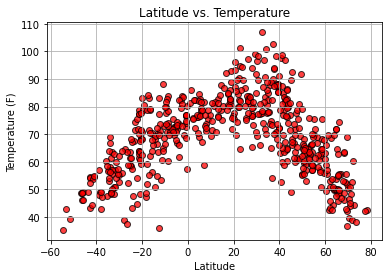

In [13]:
plt.scatter(df['Lat'], df['Max Temp (F)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

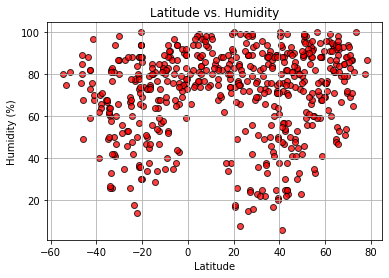

In [14]:
plt.scatter(df['Lat'], df['Humidity (%)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

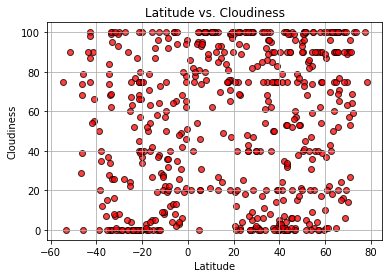

In [15]:
plt.scatter(df['Lat'], df['Cloudiness (%)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

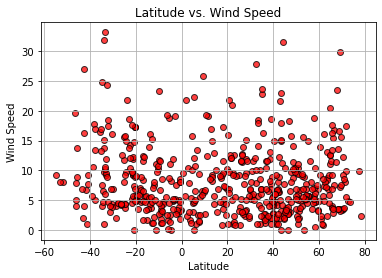

In [16]:
plt.scatter(df['Lat'], df['Windspeed (mph)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [17]:
south_df = df[df['Lat'] < 0]
north_df = df[df['Lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4432918131403814


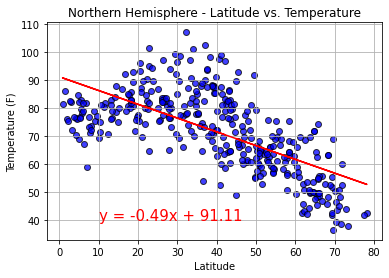

In [27]:
x_values = north_df['Lat']
y_values = north_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/North_Lat_vs_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.505555696640831


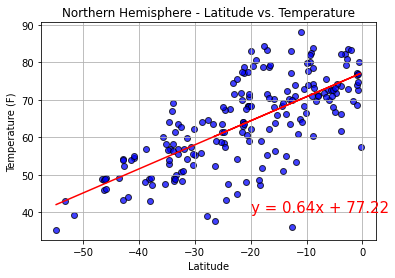

In [28]:
x_values = south_df['Lat']
y_values = south_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/South_Lat_vs_Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.096412549609784e-06


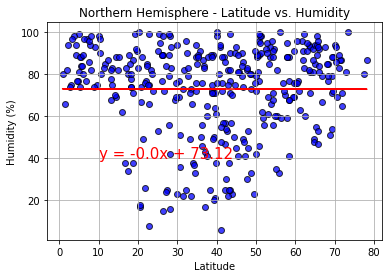

In [29]:
x_values = north_df['Lat']
y_values = north_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/North_Lat_vs_Hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014281911321813808


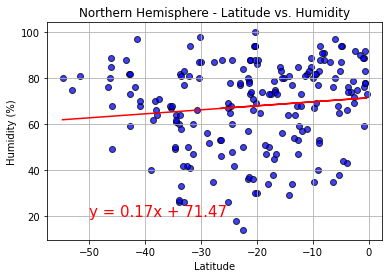

In [30]:
x_values = south_df['Lat']
y_values = south_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/South_Lat_vs_Hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020095085794356914


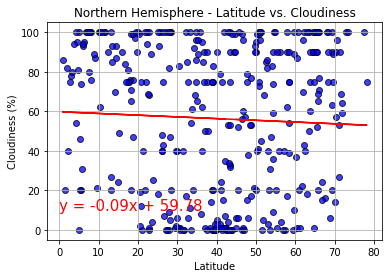

In [31]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/North_Lat_vs_Cld.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002219325711357043


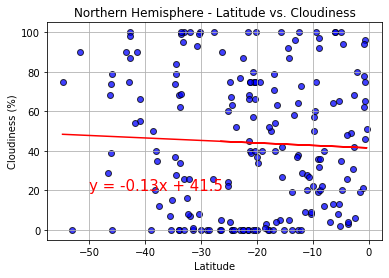

In [32]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/South_Lat_vs_Cld.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.4831169341134446e-08


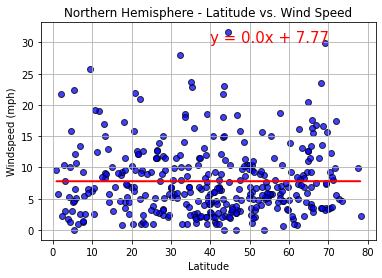

In [33]:
x_values = north_df['Lat']
y_values = north_df['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/North_Lat_vs_WS.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08182894570379265


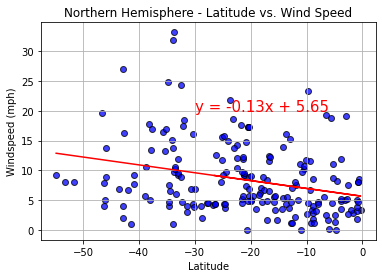

In [34]:
x_values = south_df['Lat']
y_values = south_df['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/South_Lat_vs_WS.png')

In [35]:
# Observations:
#     Temperature increases as latitude approaches 0.
#     Latitude had no effect on wind speed, humidity, or cloudiness.
#     Hemisphere has no influence on any variable.  
#         Although the temperature graphs appear different at first, in both cases temperature increases as latitude approaches 0.